/Users/swatichandna/.pyenv/versions/3.11.7/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


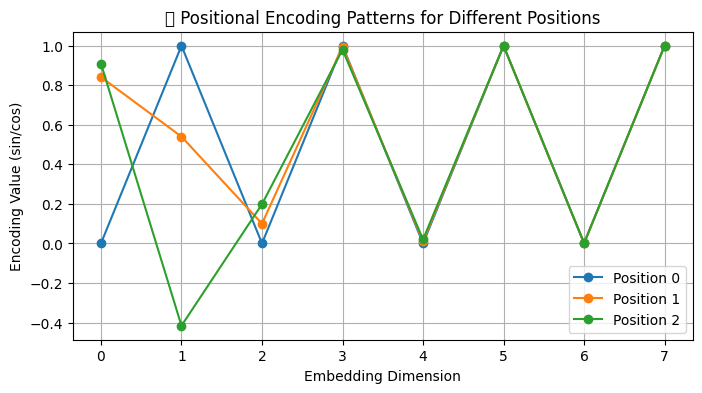

In [5]:
# =============================================================
# Positional Encoding
# Sentence: "I love AI"
# =============================================================

import torch, math
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1️. Define parameters
# -------------------------------------------------------------
seq_len = 3      # 3 positions -> "I", "love", "AI"
d_model = 8      # number of embedding dimensions (small for visibility)

# -------------------------------------------------------------
# 2️. Define the positional encoding function
# -------------------------------------------------------------
def positional_encoding(seq_len, d_model):
    pe = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len).unsqueeze(1).float()      # [[0], [1], [2]]
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)  # even indices -> sin
    pe[:, 1::2] = torch.cos(position * div_term)  # odd indices -> cos
    return pe

# -------------------------------------------------------------
# 3️. Generate encodings for 3 positions
# -------------------------------------------------------------
pos_enc = positional_encoding(seq_len, d_model)

# -------------------------------------------------------------
# 4️. Plot sine/cosine patterns for each position
# -------------------------------------------------------------
plt.figure(figsize=(8, 4))

for i in range(seq_len):
    plt.plot(range(d_model), pos_enc[i].numpy(), marker='o', label=f"Position {i}")

plt.title("📈 Positional Encoding Patterns for Different Positions")
plt.xlabel("Embedding Dimension")
plt.ylabel("Encoding Value (sin/cos)")
plt.legend()
plt.grid(True)
plt.show()
